In [13]:
import dukit
import os
import numpy as np
# use gui backend
%matplotlib tk

In [14]:
here = os.getcwd()
with open(
    os.path.dirname(here) + "/TEST_DATA_PATH.py", encoding="utf-8"
) as fid:
    exec(fid.read())  # reads in TEST_DATA_PATH string
DIR = TEST_DATA_PATH + "mz_test/"

In [15]:
np_text_file_path = DIR + "ODMR - Pulsed_10_Rectangle_bin_8/field/sig_sub_ref/sig_sub_ref_bnv_0.txt"
json_output_path = DIR + "polys_mz_comparison.json"
json_input_path = DIR + "polys.json"
mean_plus_minus = 0.25

In [16]:
pgon_patch = {
    "facecolor": None,
    "edgecolor": "xkcd:grass green",
    "linestyle": "dashed",
    "fill": False,
    "linewidth": 2,
}
mesh_size = 512
height = 290e-9
res = 700e-9
fov_size = 30e-6

In [17]:
sim = dukit.ComparisonMagSim(np_text_file_path, (30e-6, 30e-6))

In [18]:
# add from prev. file
sim.add_polygons(json_input_path)
# OR gui-select polygons, use 'alt' to signal finished polygon (can have multiple)
# (shift + mouse to move, r + scroll to resize, for example), close window to continue
# sim.select_polygons(output_path=json_output_path, mean_plus_minus=mean_plus_minus)

In [19]:
sim.rescale(3) # to resize polygons

defining magnets...:   0%|          | 0/1 [00:00<?, ?polygons/s]

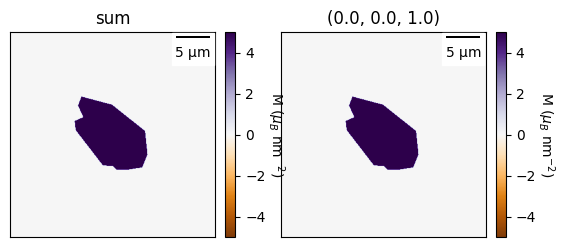

In [20]:
%matplotlib inline
sim.define_magnets(5, (0, 0, 1))
_ = sim.plot_magsim_magnetizations(annotate_polygons=True, polygon_patch_params=pgon_patch)

In [21]:
sim.run(290e-9, pad_mode="constant", resolution=700e-9)

propagating stray field...:   0%|          | 0/1 [00:00<?, ?mag. unit vectors/s]

In [22]:
unv = [np.sqrt(1 / 3), np.sqrt(1 / 3), np.sqrt(1 / 3)]

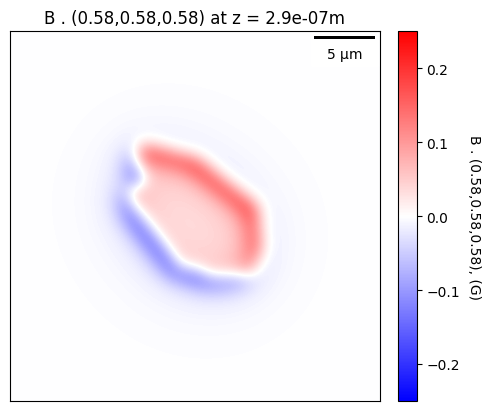

In [23]:
_ = sim.plot_magsim_bfield_at_nvs(
    strict_range=(-0.25, 0.25), projection=unv
)  # these return fig, ax

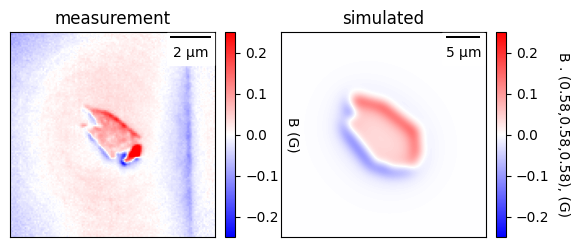

In [24]:
_ = sim.plot_comparison(
    strict_range=(-0.25, 0.25), projection=unv
)  # so you could e.g. run: fig, _ = sim.plot_comparison(); fig.savefig(path)